In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML

In [3]:
import re

In [4]:
data = pd.read_csv('../native_ad_data.csv')

Let's start with a littler data cleanup: stripdown dates

In [5]:
#data['date'] = data['date'].apply(lambda x: x.split('T')[0])

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data['date'].dtype

dtype('<M8[ns]')

In [8]:
data = data.set_index('date')

In [9]:
data['date'] = data.index.date

In [10]:
data.head()

,_id,headline,link,img,provider,source,img_file,final_link,date
date,,,,,,,,,
2017-04-23 06:30:59.796,ObjectId(58fc4a639e1e2a693fe54747),\nWhy People At NBC Are Reportedly Worried Abo...,http://www.zergnet.com/i/1597590/50261/0/0/139...,http://img5.zergnet.com/1597590_300.jpg,zergnet,http://tmz.com,76f999e904074946360b8116ed46841d6c26d2df.jpg,http://www.zergnet.com/news/1597590/why-people...,2017-04-23
2017-04-23 06:30:59.835,ObjectId(58fc4a639e1e2a693fe54748),\nMagic Johnson Opens Up About His Son EJ Comi...,http://www.zergnet.com/i/1642211/50261/0/0/139...,http://img4.zergnet.com/1642211_300.jpg,zergnet,http://tmz.com,fab1d021d6f6a57c778988a90aa7803375e2550a.jpg,http://www.zergnet.com/news/1642211/magic-john...,2017-04-23
2017-04-23 06:30:59.889,ObjectId(58fc4a639e1e2a693fe54749),\nAnthony Bourdain Relieved to No Longer Prete...,http://www.zergnet.com/i/1597599/50261/0/0/139...,http://img4.zergnet.com/1597599_300.jpg,zergnet,http://tmz.com,db6f8f33bfca04150222fb771cfc86fd572f6e9b.jpg,http://www.zergnet.com/news/1597599/anthony-bo...,2017-04-23
2017-04-23 06:30:59.943,ObjectId(58fc4a639e1e2a693fe5474a),\nThe Real Reason Demi Moore & Ashton Kutcher ...,http://www.zergnet.com/i/1611238/50261/0/0/139...,http://img5.zergnet.com/1611238_300.jpg,zergnet,http://tmz.com,ba5f7e095f8d048dfbe36997a122205ed8847bcd.jpg,http://www.zergnet.com/news/1611238/the-real-r...,2017-04-23
2017-04-23 06:31:00.003,ObjectId(58fc4a639e1e2a693fe5474b),\nCarmelo and La La Anthony's Prenup Will Cont...,http://www.zergnet.com/io/1646212/50262/0/0/13...,http://img1.zergnet.com/1646212_300.jpg,zergnet,http://tmz.com,2c2eded673d1577bb7f5e139867bf7d08289eeae.jpg,http://www.tmz.com/2017/04/20/carmelo-la-la-an...,2017-04-23


The one's from zergnet all have some newlines we need to get rid of and they appear to have concatenated the headline with the provider. So let's clean those up.

In [11]:
data['headline'] = data['headline'].apply(lambda x: re.sub('(?<=[a-z])\.?([A-Z](.*))' , '', x.strip()))
data.head()

,_id,headline,link,img,provider,source,img_file,final_link,date
date,,,,,,,,,
2017-04-23 06:30:59.796,ObjectId(58fc4a639e1e2a693fe54747),Why People At NBC Are Reportedly Worried About...,http://www.zergnet.com/i/1597590/50261/0/0/139...,http://img5.zergnet.com/1597590_300.jpg,zergnet,http://tmz.com,76f999e904074946360b8116ed46841d6c26d2df.jpg,http://www.zergnet.com/news/1597590/why-people...,2017-04-23
2017-04-23 06:30:59.835,ObjectId(58fc4a639e1e2a693fe54748),Magic Johnson Opens Up About His Son EJ Coming...,http://www.zergnet.com/i/1642211/50261/0/0/139...,http://img4.zergnet.com/1642211_300.jpg,zergnet,http://tmz.com,fab1d021d6f6a57c778988a90aa7803375e2550a.jpg,http://www.zergnet.com/news/1642211/magic-john...,2017-04-23
2017-04-23 06:30:59.889,ObjectId(58fc4a639e1e2a693fe54749),Anthony Bourdain Relieved to No Longer Pretend...,http://www.zergnet.com/i/1597599/50261/0/0/139...,http://img4.zergnet.com/1597599_300.jpg,zergnet,http://tmz.com,db6f8f33bfca04150222fb771cfc86fd572f6e9b.jpg,http://www.zergnet.com/news/1597599/anthony-bo...,2017-04-23
2017-04-23 06:30:59.943,ObjectId(58fc4a639e1e2a693fe5474a),The Real Reason Demi Moore & Ashton Kutcher Go...,http://www.zergnet.com/i/1611238/50261/0/0/139...,http://img5.zergnet.com/1611238_300.jpg,zergnet,http://tmz.com,ba5f7e095f8d048dfbe36997a122205ed8847bcd.jpg,http://www.zergnet.com/news/1611238/the-real-r...,2017-04-23
2017-04-23 06:31:00.003,ObjectId(58fc4a639e1e2a693fe5474b),Carmelo and La La Anthony's Prenup Will Contro...,http://www.zergnet.com/io/1646212/50262/0/0/13...,http://img1.zergnet.com/1646212_300.jpg,zergnet,http://tmz.com,2c2eded673d1577bb7f5e139867bf7d08289eeae.jpg,http://www.tmz.com/2017/04/20/carmelo-la-la-an...,2017-04-23


In [12]:
data['headline']

date
2017-04-23 06:30:59.796    Why People At NBC Are Reportedly Worried About...
2017-04-23 06:30:59.835    Magic Johnson Opens Up About His Son EJ Coming...
2017-04-23 06:30:59.889    Anthony Bourdain Relieved to No Longer Pretend...
2017-04-23 06:30:59.943    The Real Reason Demi Moore & Ashton Kutcher Go...
2017-04-23 06:31:00.003    Carmelo and La La Anthony's Prenup Will Contro...
2017-04-23 06:31:00.328    Steve Harvey Comes to the Defense of President...
2017-04-23 06:31:00.743       Richard Simmons Goes Out in Public in Disguise
2017-04-23 06:31:01.043       Drake's House Burglarized By Oddly Thirsty Fan
2017-04-23 06:31:01.366    Magic Johnson Opens Up About His Son EJ Coming...
2017-04-23 06:31:01.424    'The Situation' Could Face Up To 20 Years in P...
2017-04-23 06:31:01.485    Why Gwen Stefani Went Pale When Blake Announce...
2017-04-23 06:31:01.539          Alessandra Ambrosio Stuns at Private Dinner
2017-04-23 06:31:02.101             Olivia Munn Arrives Braless at Vanc

OK, that's better.

Do we have any null values?

In [13]:
for col in data.columns:
    print((col, sum(data[col].isnull())))

('_id', 0)
('headline', 0)
('link', 0)
('img', 0)
('provider', 0)
('source', 0)
('img_file', 222)
('final_link', 0)
('date', 0)


For future reference, we have a small number of img_files that are null (probably because the scraper errored out grabbing the file). For the most part, that's pretty good.

In [14]:
data.describe()

,_id,headline,link,img,provider,source,img_file,final_link,date
count,92410,92410,92410,92410,92410,92410,92188,92410,92410
unique,92410,14057,27510,18878,3,18,18856,23539,71
top,ObjectId(5930eefa9e1e2a3042a6a98f),Here’s Why Guys Are Obsessed With This Underwear…,https://grizly.com/lifestyle/guy-turned-backya...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,db07ff3401037653d665822c5a78617464fe4ef8.jpg,https://grizly.com/lifestyle/guy-turned-backya...,2017-05-31
freq,1,789,459,494,45961,18885,494,459,2420


Already we can see some interesting trends here. Out of 64147 unique records, only 10260 of the headlines are unique, but 19212 of the links are unique and 12709 of the image files are unique (assuming for sure that there were issues with downloading images, but more on that later). So it seems already that there are content links which might reuse the same headline, or image for different destination articles. Let's try to dig into that.

We're working with a lot of duplicates, I'm sure. Let's remove anything where the headline, link, img, provider, source, img_file, final_link are the same. This should only give us back the unique records we're looking for.

In [15]:
deduped = data.drop_duplicates(subset=['headline', 'link', 'img', 'provider', 'source', 'img_file', 'final_link'], keep=False)

In [16]:
deduped.describe()

,_id,headline,link,img,provider,source,img_file,final_link,date
count,27947,27947,27947,27947,27947,27947,27886,27947,27947
unique,27947,11831,21620,15108,3,18,15081,18903,71
top,ObjectId(593ca3369e1e2a0ea0c0901a),Nicole Kidman's Yacht Is Far From You'd Expect,http://topictracker.online/?utm_campaign=us-tb...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,f18167ca58fee4ae691a28ecd39b0c1afe2689e4.jpg,http://www.zergnet.com/news/694817/kim-kardash...,2017-05-31
freq,1,269,95,269,11037,3926,269,90,890


And let's just check on those null values again...

In [17]:
for col in deduped.columns:
    print((col, sum(deduped[col].isnull())))

('_id', 0)
('headline', 0)
('link', 0)
('img', 0)
('provider', 0)
('source', 0)
('img_file', 61)
('final_link', 0)
('date', 0)


only 0.2% of images are not available. I think that's ok, It's possible, since we have the original URL, that we might be able to go back and grab them.

Just to be sure it's doing what we assume it's doing, let's just remove duplicates based on headline. I assume this would leave us with far less records as I don't doubt that the same headline migh appear on another website.

In [18]:
deduped_hl = data.drop_duplicates(subset=['headline'], keep=False)

In [19]:
deduped_hl.describe()

,_id,headline,link,img,provider,source,img_file,final_link,date
count,6881,6881,6881,6881,6881,6881,6858,6881,6881
unique,6881,6881,6353,6552,3,18,6531,6354,71
top,ObjectId(593ca3369e1e2a0ea0c0901a),Quiz: Do You Use WWII Slang Without Even…,http://advertisementfeature.cnn.com/2017/yanmar,http://cdn.taboolasyndication.com/libtrc/stati...,outbrain,http://www.politico.com/magazine/,42e88ba4c1e41b38af84e509ce0c476c88d5d139.jpg,http://advertisementfeature.cnn.com/2017/yanmar/,2017-05-31
freq,1,1,8,6,3339,1090,6,8,238


And sure enought we're only left with 4999 records if we only want records with unique headlines.

In [20]:
deduped_hl_source = data.drop_duplicates(subset=['headline', 'source'], keep=False)

In [21]:
deduped_hl_source.describe()

,_id,headline,link,img,provider,source,img_file,final_link,date
count,10853,10853,10853,10853,10853,10853,10808,10853,10853
unique,10853,9272,9376,9371,3,18,9339,9379,71
top,ObjectId(593ca3369e1e2a0ea0c0901a),5 Steps To Raising A Viking Child,https://ad.doubleclick.net/ddm/trackclk/N6296....,https://console.brax-cdn.com/creatives/645b850...,taboola,http://www.politico.com/magazine/,b8abf89e3effc8105cb0f5cf621bf4bd7b322f42.png,https://www.verizon.com/home/fios-gigabit-conn...,2017-05-31
freq,1,6,21,12,5345,1226,12,21,380


But that's enough of that. Let's return to the unique records we're interested in in `deduped`. But first, let's take a look at the rate of success for our record collection.

In [22]:
(19131/64147)*100

29.823686220711803

Crud, doing a harvest yields results where only 30% of our sample is worth examining further. By projection, if we wanted to examine ~100,000 unique records, we're going to have to collect ~340000 records. At this rate, that's still some time away. But let's have our anlysis framework ready for that time.

Note: We might still be interested in the duplicates if we take a look at the distribution of those records over time. Below, we should probably reduce the date of collection to a week or maybe a 3 day sequence and only remove duplicates if they happened within that period. Which might tell us something about content being shuffled in and out by the provider.

Let's get the top 10 headlines grouped by img

In [23]:
deduped['headline'].groupby(deduped['img']).value_counts().nlargest(10)

img                                                                                              headline                                                                                                 
http://cdn.taboolasyndication.com/libtrc/static/thumbnails/21a99ebd78f2af61aeeec2074e0376c0.jpg  Nicole Kidman's Yacht Is Far From You'd Expect                                                               269
http://cdn.taboolasyndication.com/libtrc/static/thumbnails/0dba2430aca9e98e05160cfd6e6d3171.jpg  Here Is How You Upgrade To Business Class                                                                    185
http://cdn.taboolasyndication.com/libtrc/static/thumbnails/6b232005189e48716587f79b33347846.jpg  Tiger Woods' Yacht Is Far From You'd Expect                                                                  151
http://cdn.taboolasyndication.com/libtrc/static/thumbnails/2e967b6db0813815a899401b4746a749.jpg  Stairlifts are disrupting the multi-billion dollar retirement home ind

In [24]:
deduped['headline'].value_counts().nlargest(10)

Nicole Kidman's Yacht Is Far From You'd Expect                                                               269
Forget Social Security if you Own a Home (Do This)                                                           206
Here Is How You Upgrade To Business Class                                                                    185
Tiger Woods' Yacht Is Far From You'd Expect                                                                  156
New Jersey Landlines Get Replaced (But Not With Cell Phones)                                                 156
Stairlifts are disrupting the multi-billion dollar retirement home industry - keeping seniors independent    144
Best Senior Living Communities Of 2017! View Pricing Here & Compare                                          118
After Losing 220lbs Rebel Wilson Is Gorgeous Now!                                                             96
Kim Kardashian and North West Turn Heads On The Red Carpet                                      

But hang on. let's just see what the top headlines are. There's certainly overlap, but it's not a one to one relationship between headlines and their images (or at least maybe it's the same image, but coming from a different URL).

Note: perhaps something we will want to look into is how many different headline, image permutations there are. I am particularly interested in the reuse of images across different headlines.

In [25]:
deduped['source'].value_counts().nlargest(25)

http://tmz.com                       3926
http://elitedaily.com/               3889
http://www.politico.com/magazine/    2491
https://www.washingtonpost.com/      2283
http://www.thedailybeast.com/        2141
http://www.breitbart.com             1961
http://www.businessinsider.com/      1482
http://thehill.com                   1465
http://www.rt.com                    1377
http://www.politico.com/politics     1368
http://www.dailymail.co.uk/          1068
http://reductress.com/               1013
https://nypost.com/news/              776
http://www.nydailynews.com/news       751
http://www.huffingtonpost.com/        701
http://observer.com/latest/           648
https://www.therebel.media/news       536
http://gothamist.com/news              71
Name: source, dtype: int64

Whoops, if you notice, there are some sites missing here. Because of the inconsistencies in how PhantomJS works, 4 of our sites have not been collected from this entire time (they have been on our local copy).

ok so what are the most frequent images?

In [26]:
#topimgs = deduped['img'].value_counts().nlargest(10).index.tolist()

In [27]:
#topimgs_taboola = deduped['img'][deduped['provider'].isin(['taboola'])].value_counts().nlargest(10).index.tolist()

In [28]:
#topimgs_outbrain = deduped['img'][deduped['provider'].isin(['outbrain'])].value_counts().nlargest(10).index.tolist()

In [29]:
#topimgs_zergnet = deduped['img'][deduped['provider'].isin(['zergnet'])].value_counts().nlargest(10).index.tolist()

If we go back to our provider list, we'll notice that there is nothing from revcontent, and this will reflect in that the 4 sites that are missing from our crawl on our server are all revcontent sites. That's annoying.

In [30]:
deduped['provider'].value_counts()

taboola     11037
outbrain     9804
zergnet      7106
Name: provider, dtype: int64

In [31]:
#for i in topimgs:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

Great, lets compare them by source.

In [32]:
#for i in topimgs_taboola:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

In [33]:
#for i in topimgs_outbrain:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

In [34]:
#for i in topimgs_zergnet:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

Yawn!!

In [35]:
dates = deduped['date']

In [36]:
dates[0]

datetime.date(2017, 4, 23)

In [37]:
deduped = deduped.sort_values('date', ascending=True)

In [54]:
deduped.groupby(['date','provider']).size().nlargest(25).plot(kind=)

date        provider
2017-05-31  taboola     436
2017-06-15  outbrain    296
2017-06-13  outbrain    286
2017-06-12  outbrain    285
2017-06-16  outbrain    277
2017-06-07  outbrain    265
2017-06-08  outbrain    259
2017-05-07  taboola     257
2017-05-25  taboola     256
2017-06-18  outbrain    252
2017-06-09  outbrain    241
2017-06-11  outbrain    240
2017-06-05  zergnet     235
2017-05-31  zergnet     232
2017-05-20  taboola     229
2017-05-18  taboola     225
2017-06-20  outbrain    223
2017-05-31  outbrain    222
2017-06-05  outbrain    222
2017-06-09  taboola     220
2017-06-20  taboola     218
2017-05-16  taboola     216
2017-07-01  taboola     216
2017-05-19  taboola     213
2017-06-18  zergnet     212
dtype: int64

In [52]:
deduped.groupby(['date','headline','source']).size().plot()

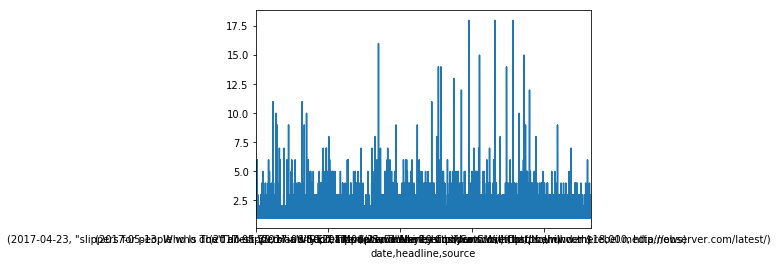

In [53]:
plt.show()